In [10]:
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd
import seaborn as sns
from matplotlib.style import reload_library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from machine_learning.config import EXTERNAL_DATA_DIR, MPLSTYLE_DIR

2025-02-23 11:40:56.683 | INFO     | machine_learning.config:<module>:11 - PROJ_ROOT path is: D:\Documents\3 Production Save Files\1 Cloned repositories\machine-learning


# Data Retrieval and some EDA

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [3]:
student_performance['variables']

,name,role,type,demographic,description,units,missing_values
0,school,Feature,Categorical,None,student's school (binary: 'GP' - Gabriel Perei...,None,no
1,sex,Feature,Binary,Sex,student's sex (binary: 'F' - female or 'M' - m...,None,no
2,age,Feature,Integer,Age,student's age (numeric: from 15 to 22),None,no
3,address,Feature,Categorical,None,student's home address type (binary: 'U' - urb...,None,no
4,famsize,Feature,Categorical,Other,family size (binary: 'LE3' - less or equal to ...,None,no
5,Pstatus,Feature,Categorical,Other,parent's cohabitation status (binary: 'T' - li...,None,no
6,Medu,Feature,Integer,Education Level,"mother's education (numeric: 0 - none, 1 - pr...",None,no
7,Fedu,Feature,Integer,Education Level,"father's education (numeric: 0 - none, 1 - pr...",None,no
8,Mjob,Feature,Categorical,Occupation,"mother's job (nominal: 'teacher', 'health' car...",None,no
9,Fjob,Feature,Categorical,Occupation,"father's job (nominal: 'teacher', 'health' car...",None,no


In [11]:
student_performance['data']['features'].select_dtypes("number")

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,4
1,17,1,1,1,2,0,5,3,3,1,1,3,2
2,15,1,1,1,2,0,4,3,2,2,3,3,6
3,15,4,2,1,3,0,3,2,2,1,1,5,0
4,16,3,3,1,2,0,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4
645,18,3,1,1,2,0,4,3,4,1,1,1,4
646,18,1,1,2,2,0,1,1,1,1,1,5,6
647,17,3,1,2,1,0,2,4,5,3,4,2,6


In [9]:
student_performance['data']['targets']['G1']

0       0
1       9
2      12
3      14
4      11
       ..
644    10
645    15
646    11
647    10
648    10
Name: G1, Length: 649, dtype: int64

# Trying KNN

In [12]:
reload_library()
plt.style.use(MPLSTYLE_DIR / "iragca_ml.mplstyle")

2025-02-23 12:00:30.374 | INFO     | machine_learning.modeling.pipepline:grid_search:64 - Starting Grid Search for Student Performance. n_neighbors: range(1, 101), trials: 50


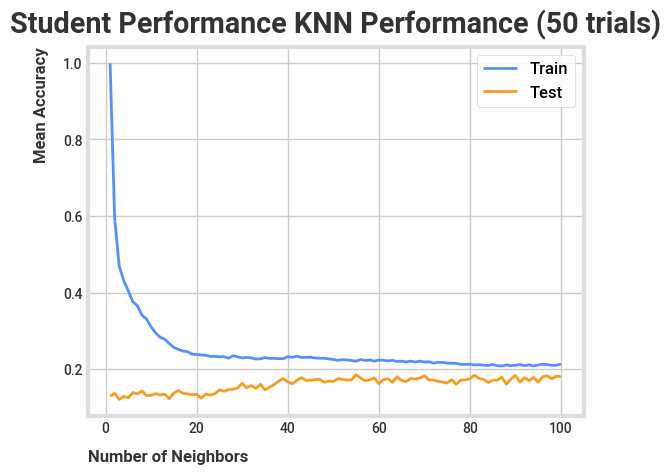

2025-02-23 12:03:58.394 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Student Performance
 Train max accuracy: 0.9987328767123287
 Test max accuracy: 0.1852307692307692


In [ ]:
from machine_learning.modeling import pipepline
X, y = student_performance['data']['features'].select_dtypes("number"), student_performance['data']['targets']['G3']


sp_knn = pipepline.KNNPipeline(X, y, "Student Performance")

sp_knn_results = sp_knn.grid_search(range(1, 101), trials=50, plot=True, test_size=0.10)